### First import all the neccessary libraries


In [22]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import scipy 

### import the data set

In [2]:
data = pd.read_csv("/Users/keksmacbookair/Desktop/COURSE_WORKS/course_work_sem_2/Probability_and_statistics/data_Sets/diamonds.csv")

- We can now vie the new data frame

In [3]:
data

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53915,2757,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
53916,2757,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
53917,2757,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
53918,2757,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74


### Getting a bit of information about the data frame

In [4]:
data.info()

data.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53920 entries, 0 to 53919
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    53920 non-null  int64  
 1   carat    53920 non-null  float64
 2   cut      53920 non-null  object 
 3   color    53920 non-null  object 
 4   clarity  53920 non-null  object 
 5   depth    53920 non-null  float64
 6   table    53920 non-null  float64
 7   x        53920 non-null  float64
 8   y        53920 non-null  float64
 9   z        53920 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


price        int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
dtype: object

### checking for missing data in the data frame and removing duplicates

In [5]:
data2 = data.isna().sum()
data2
##There is no missing data in the data set


price      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [6]:

data2 = data.drop_duplicates()
data2
#The new data set with no duplicates has been created 

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53915,2757,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
53916,2757,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
53917,2757,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
53918,2757,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>],
       [<Axes: title={'center': 'table'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

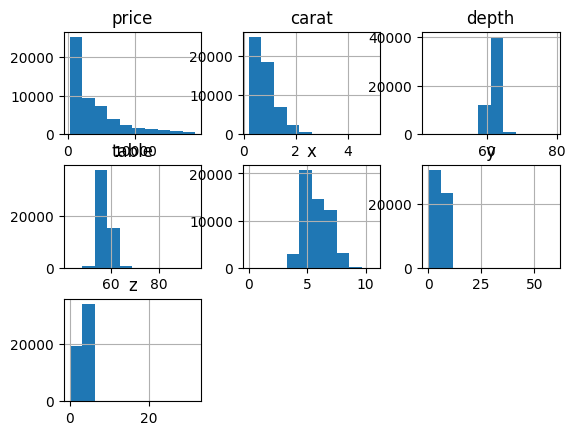

In [7]:
data2.hist()
#Gives us an overview of all the data in the data set and how it is distributed

## Number 1
### Test the hypothesis that Average price of all carat categories  is the same

In [8]:
data2.dtypes
# carat and price are both  continuous variables


price        int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
dtype: object

- Check wether the data follows gausian or normal distribution


In [9]:
data2[['carat','price']].describe()


,carat,price
count,53774.000000,53774.000000
mean,0.797859,3933.759512
std,0.473440,3988.639457
min,0.200000,326.000000
25%,0.400000,951.000000
50%,0.700000,2401.000000
75%,1.040000,5328.750000
max,5.010000,18823.000000


- We are to carryout the anova test since we are determining how the "carat" price influences "price"

In [10]:
#Install the necessary  libraries
!pip3 install statsmodels

In [33]:
#import the neccessary libraries
from scipy import stats
from statsmodels.stats import weightstats as stests 


- First grouping the carats into four categories

In [ ]:
# Grouping prices by carat
carat_groups = data2.groupby('carat')['price'].apply(list)
carat_groups

In [36]:
# We can then perform ANOVA test
f_statistic, p_value = stats.f_oneway(*carat_groups)

# Display our results
print("F-statistic:", f_statistic)
print("p-value:", p_value)


F-statistic: 1381.912664311881
p-value: 0.0


In [37]:
##verifying our result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The average prices of different carat categories are significantly different.")
else:
    print("Fail to reject the null hypothesis: The average prices of different carat categories are not significantly different.")


Reject the null hypothesis: The average prices of different carat categories are significantly different.


## Number 2
### Test the hypothesis that average price of "Premium" diamonds is 150.

### Cut out the data for premium entries

In [ ]:
data3 = data2[data2['cut']=='Premium']
data3

- We are to carryout the t-test 

In [21]:
from scipy import stats
# Perform one-sample t-test
t_statistic, p_value = stats.ttest_1samp(data3['price'], 150)
print(f'T-statistic: {t_statistic}, P-value: {p_value}')



T-statistic: 119.55554057217223, P-value: 0.0


since the p value is less than 0.05 we reject the null hypothesis
Therefore the average price of premium diamonds is not 150

### Kawooma Elijah
### B29158
### M24B38/023
### kaizzielijah@gmail.com
### bsds